In [27]:

import numpy as np 
import pandas as pd 





## Leemos los datos mediante la libreria pandas


In [28]:
data=pd.read_csv('train.csv')
data2=pd.read_csv('test.csv')

In [29]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### visualizamos los valores nulos y NAN

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Mediante el metodo info() podemos ver que existen valores nulos tanto la columna 'Age' como en 'Cabin'. Además observamos columnas 'object' que deberemos pasar a valores numéricos para poder entrenar nuestro modelo

In [32]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Mediante el comando describe() comrpobamos informacion valiosa  que nos ayudará a resolver el problema de los valores faltantes en la columna AGE
reemplazaremos los valores faltantes por la media de la edad del pasaje: 29 años

In [33]:

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Tratando los valores null

In [34]:
data['Age'] = data['Age'].replace(np.nan, data['Age'].mean())


In [35]:
data['Age'].isnull().sum()

0

## Eliminando columnas innecesarias

Determinadas columnas como 'Name' o 'Ticket' no aportarán ningun dato relevante a nuestro análisis. En el caso de 'Cabin' faltan demasiados datos como para poder usarla en nuestro proyecto

In [36]:
data.drop(columns=['Name','Ticket','Cabin'],inplace=True)

In [37]:
from sklearn.ensemble import RandomForestClassifier

## Trataremos las variables categóricas para convertirlas a numéricas

In [38]:
data_dummies=pd.get_dummies(data[['Sex','Embarked']]).astype('int')
data_ready=pd.concat([data,data_dummies],axis=1)
data_ready.drop(columns=['Sex','Embarked'],inplace=True)
data_ready.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [39]:
data_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_female   891 non-null    int64  
 8   Sex_male     891 non-null    int64  
 9   Embarked_C   891 non-null    int64  
 10  Embarked_Q   891 non-null    int64  
 11  Embarked_S   891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


## Mediante un análisis de correlación estudiaremos que variables guardan relación entre sí

In [40]:
# importamos la librería seaborn
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

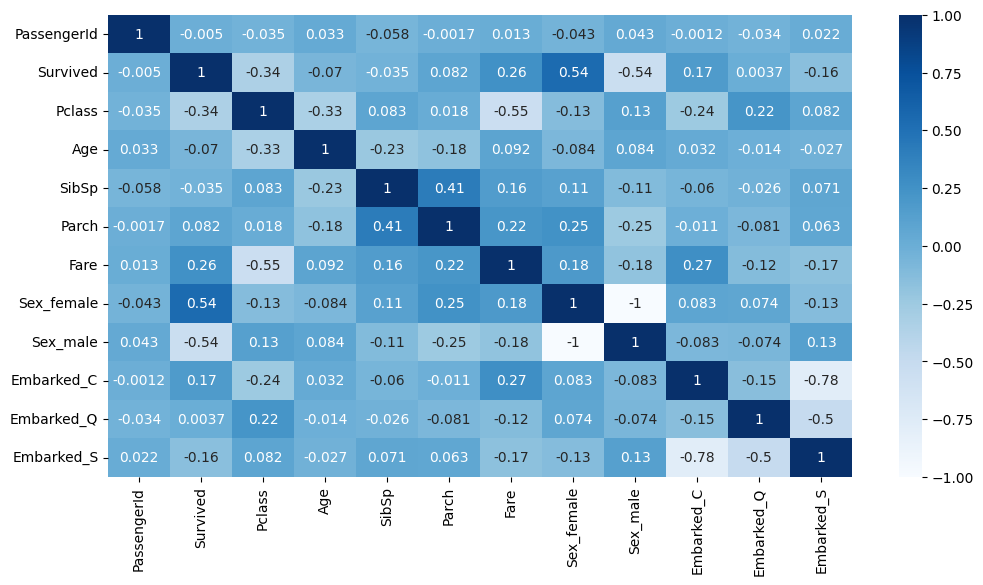

In [41]:
corr=data_ready.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,cmap='Blues',annot=True)

En este grafico vemos que no existe una relacion evidente entre cada uno de os factores y la superviviencia a excepcion de la columna 'Sex_female'

In [42]:
import plotly.express as px

In [43]:
sup_male=data_ready['Sex_male'][(data_ready['Sex_male']==1) & (data_ready['Survived']==1)].count()
sup_female=data_ready['Sex_female'][(data_ready['Sex_female']==1) & (data_ready['Survived']==1)].count()
sup_male
survived_data = pd.DataFrame({
    'Sex': ['Male', 'Female'],
    'Count': [sup_male, sup_female]
})

fig = px.pie(survived_data, names='Sex', values='Count', title='Supervivencia por Sexo')
fig.show()

### Es un dato interesante. Comprobemos el porcentaje de mujeres supervivientes que viajaban con padres o hijos

In [44]:
sup_fem_with_sons=data_ready[(data_ready['Sex_female'])&(data_ready['Parch']==1)]
sup_fem_out_sons=data_ready[(data_ready['Sex_female'])&(data_ready['Parch']==0)]

In [45]:
count_with_sons = len(sup_fem_with_sons)
count_out_sons = len(sup_fem_out_sons)


data = pd.DataFrame({
    'Condition': ['With Sons', 'Without Sons'],
    'Count': [count_with_sons, count_out_sons]
})


px.pie(data, names='Condition', values='Count', title='Female Survivors with and without Sons')




## La mayoría eran mujeres que viajaban solas

### Miremos ahora los supervivientes segun el rango de edad

In [46]:
age_group_survivors = data_ready[data_ready['Survived'] == 1].groupby('Age')['Survived'].count()

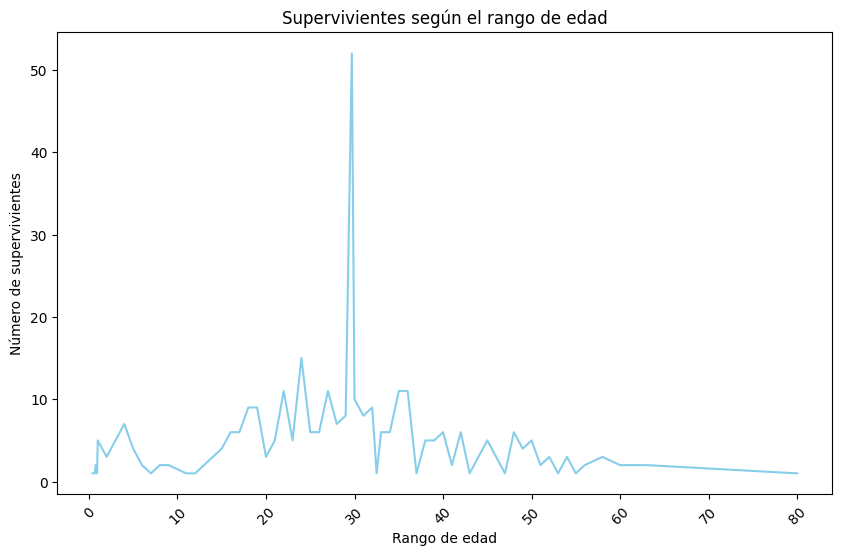

In [47]:


# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
age_group_survivors.plot(kind='line', color='skyblue')
plt.title('Supervivientes según el rango de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Número de supervivientes')
plt.xticks(rotation=45)
plt.show()

## Ahora por coste de billete

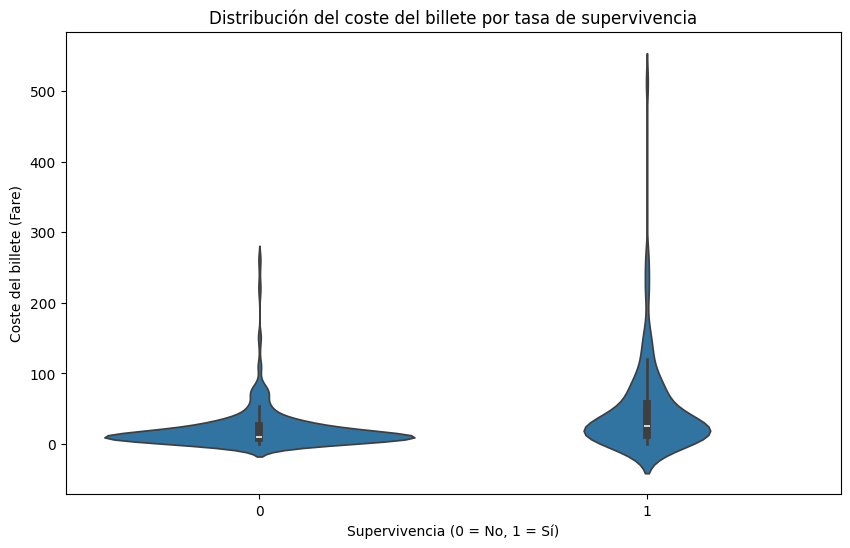

In [48]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Fare', data=data_ready)
plt.title('Distribución del coste del billete por tasa de supervivencia')
plt.xlabel('Supervivencia (0 = No, 1 = Sí)')
plt.ylabel('Coste del billete (Fare)')
plt.show()

### Segun las graficas, podemos determinar que la edad y el precio del billete tienen repercusion en la tasa de supervivencia. Los usaremos para nuestro problema de clasificación binaria.

### Por otro lado vemos que la supervivencia es mayor en personas jovenes que habian pagado camarotes mas caros, entendiendo que estos tendrían un acceso mas rapido a los botes salvavidas. Las posibilidades de supervivencia en el caso de las mujeres es mucho mayor que la de los hombres, sobre todo si viajaban solas

<br>

## Preparacion de los datos

In [49]:
#Normalizaremos las columnas Fare y Age, ya que tienen valores muy dispares

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [50]:
scaler=MinMaxScaler()
data_ready[['Age_normalized','Fare_normalized']]=scaler.fit_transform(data_ready[['Age','Fare']])
data_ready.drop(columns=['Age','Fare'],inplace=True)

In [51]:
data_ready.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_normalized,Fare_normalized
0,1,0,3,1,0,0,1,0,0,1,0.271174,0.014151
1,2,1,1,1,0,1,0,1,0,0,0.472229,0.139136
2,3,1,3,0,0,1,0,0,0,1,0.321438,0.015469
3,4,1,1,1,0,1,0,0,0,1,0.434531,0.103644
4,5,0,3,0,0,0,1,0,0,1,0.434531,0.015713


In [52]:
x=data_ready[['Pclass','SibSp','Parch','Sex_female','Sex_male','Age_normalized','Fare_normalized']]
y=data_ready['Survived']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
x.shape

(891, 7)

In [55]:
import keras

In [56]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.utils import to_categorical

In [57]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [58]:
model=Sequential()
model.add(Dense(100, activation='relu',input_shape=(7,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(2,activation='sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [59]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [60]:
model.fit(x_train, y_train, epochs=100, verbose=False)

In [61]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)

In [62]:
loss

0.4841797947883606

In [63]:
accuracy

0.7932960987091064

## Hagamos la prediccion con los datos de test

In [64]:

data2


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Preprocesamos los datos de test

In [65]:
data2['Age'].isnull().sum()

86

In [66]:
data2['Age'] = data2['Age'].replace(np.nan, data2['Age'].mean())

In [67]:
data2.drop(columns=['Name','Ticket','Cabin'],inplace=True)

In [68]:
data_dummies2=pd.get_dummies(data2[['Sex','Embarked']]).astype('int')
data_ready2=pd.concat([data2,data_dummies2],axis=1)
data_ready2.drop(columns=['Sex','Embarked'],inplace=True)
data_ready2.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [69]:
scaler2=MinMaxScaler()
data_ready2[['Age_normalized','Fare_normalized']]=scaler.fit_transform(data_ready2[['Age','Fare']])
data_ready2.drop(columns=['Age','Fare'],inplace=True)

In [70]:
data_ready2

,PassengerId,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_normalized,Fare_normalized
0,892,3,0,0,0,1,0,1,0,0.452723,0.015282
1,893,3,1,0,1,0,0,0,1,0.617566,0.013663
2,894,2,0,0,0,1,0,1,0,0.815377,0.018909
3,895,3,0,0,0,1,0,0,1,0.353818,0.016908
4,896,3,1,1,1,0,0,0,1,0.287881,0.023984
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,0,1,0,0,1,0.396975,0.015713
414,1306,1,0,0,1,0,1,0,0,0.512066,0.212559
415,1307,3,0,0,0,1,0,0,1,0.505473,0.014151
416,1308,3,0,0,0,1,0,0,1,0.396975,0.015713


In [71]:
x2=data_ready2[['Pclass','SibSp','Parch','Sex_female','Sex_male','Age_normalized','Fare_normalized']]


In [72]:
prediction2=best_random_model.predict(x2)
prediction2


NameError: name 'best_random_model' is not defined

In [170]:
final_prediction=pd.DataFrame({
    'PassengerId': data_ready2['PassengerId'],
    'Survived': prediction2
})

In [171]:
final_prediction

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [173]:
final_prediction.to_csv('prediction.csv',index=False)